### In this toturial I applied several ML algorithms to data set to determine if a project would be successful or not. 
---
The codes resources were provided at the end of this toturial. 
I think everyone can easily find the tools online and just arrange for them to achieve their desired goal. 
In this work, You will go through following steps.

1. Missed values
2. Adding a new column to data
3. Delete some useless columns
4. Visualization
5. Parameters Featuring and Transforming (Dealing with those parameters that are an object not digit)
6. Splitting data (train, validate and test)
7. Fitting ML models (Random Forest, Logistic Regression, Decision Tree, Gaussian, Linear SVC)
8. Accuracy, Precision, Sensitivity or Recall, F1 score concepts
9. Evaluating Model Performances
10. Saving your model
11. Uploading your model and how to apply it to other data

### Import libraries
---

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mp
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score 
from sklearn import tree
import sklearn
from plot_metric.functions import BinaryClassification

In [2]:
# !pip install --upgrade sklearn
# !pip install -U scikit-learn
# !pip install --upgrade sklearn
# !pip install scikit-learn
# !pip install missingno
# !pip install plot-metric

### Load the data
---

In [3]:
data = pd.read_csv("data.csv")
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Check out the shape of data.

In [4]:
print(data.shape)

(378661, 15)


As it is seen, the data includes almost 400K rows and 15 columns.

What are the data column names?

In [5]:
print(data.keys())

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')


Lets see what columns types are numeric.

In [6]:
numeric_features = data.select_dtypes(include=[np.number])
print(numeric_features.columns)

Index(['ID', 'goal', 'pledged', 'backers', 'usd pledged', 'usd_pledged_real',
       'usd_goal_real'],
      dtype='object')


And see those columns that type is categorical.

In [7]:
categorical_features = data.select_dtypes(include=[np.object])
print(categorical_features.columns)

Index(['name', 'category', 'main_category', 'currency', 'deadline', 'launched',
       'state', 'country'],
      dtype='object')


### Data Cleaning
---

In [8]:
data.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


### Dealing with NaN Values
See if there are null/ missing/NaN in data. 

In [9]:
def null_table(data):
    print("Training Data Frame")
    print(pd.isnull(data).sum()) 
    print(" ")
    
null_table(data)

Training Data Frame
ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64
 


The name of project and the ID do not affect a project final results (successful or not successful). 
In addition, the currency should be taken out of data becasue the pledges were provided in USD.

Drop name and project ID. 

In [10]:
data.drop(labels = ["ID","name"], axis = 1, inplace = True)

And double check the data and see the null_table

In [11]:
null_table(data)

Training Data Frame
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64
 


As it is observed in the **usd_pledged** there are about 4K null/nan rows. Lets drop those rows that missed.

In [12]:
data = data[np.isfinite(data['usd pledged'])]
print(null_table(data))

Training Data Frame
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64
 
None


### EDA
---

Let's calculate the number of days for each project as a new feather and add it to the data. 

In [13]:
data.head()

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Subtract columns **launched** and **deadline** to find out how much time was available for each project. Lets call the new column **number of days**. 

First, convert date string to datetime with a proper format string. Make two new columns and make sure the number of days format is an integer by making a decision.

In [14]:
launched = pd.DataFrame({'NumOfDays':pd.to_datetime(data['launched'], format='%Y-%m-%d')})
deadline = pd.DataFrame({'NumOfDays':pd.to_datetime(data['deadline'], format='%Y-%m-%d')})

Add number of days column to data as follow.

In [15]:
data['NumOfDays'] = (deadline - launched) / np.timedelta64(1, 'D')  
data.head()

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,NumOfDays
0,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,58.491343
1,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,59.802813
2,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,44.985532
3,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,29.858206
4,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,55.642326


Drop columns including **launched** and **dedline** and **currency**.

In [16]:
data.drop(labels = ["deadline","launched","currency"], axis = 1, inplace = True)

In [17]:
data.head()

,category,main_category,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,NumOfDays
0,Poetry,Publishing,1000.0,0.0,failed,0,GB,0.0,0.0,1533.95,58.491343
1,Narrative Film,Film & Video,30000.0,2421.0,failed,15,US,100.0,2421.0,30000.00,59.802813
2,Narrative Film,Film & Video,45000.0,220.0,failed,3,US,220.0,220.0,45000.00,44.985532
3,Music,Music,5000.0,1.0,failed,1,US,1.0,1.0,5000.00,29.858206
4,Film & Video,Film & Video,19500.0,1283.0,canceled,14,US,1283.0,1283.0,19500.00,55.642326


### Turn categorical values to numerical
---

In [18]:
data_obj = data.select_dtypes(include=['object']).copy()
data_obj.head()

,category,main_category,state,country
0,Poetry,Publishing,failed,GB
1,Narrative Film,Film & Video,failed,US
2,Narrative Film,Film & Video,failed,US
3,Music,Music,failed,US
4,Film & Video,Film & Video,canceled,US


Check out the frequency distribution of categories within the data_obj.

In [19]:
for col in data_obj.columns:
    print('Number of {} is = '.format(col), data_obj[col].value_counts().count())

Number of category is =  159
Number of main_category is =  15
Number of state is =  5
Number of country is =  22


Replace the objects with numerical values.

In [20]:
for col in data_obj.columns:

    labels = data_obj[col].astype('category').cat.categories.tolist()
    replace_map_comp1 = {col : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
    data_obj.replace(replace_map_comp1, inplace=True)

See the new object table with generated numerical values.

In [21]:
data_obj.head()

,category,main_category,state,country
0,109,13,2,10
1,94,7,2,22
2,94,7,2,22
3,91,11,2,22
4,56,7,1,22


Replace the numerical values with the categorical columns within the data set.

In [22]:
for col in data_obj.columns:
    data[col] = data_obj[col]
data.head()   

,category,main_category,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,NumOfDays
0,109,13,1000.0,0.0,2,0,10,0.0,0.0,1533.95,58.491343
1,94,7,30000.0,2421.0,2,15,22,100.0,2421.0,30000.00,59.802813
2,94,7,45000.0,220.0,2,3,22,220.0,220.0,45000.00,44.985532
3,91,11,5000.0,1.0,2,1,22,1.0,1.0,5000.00,29.858206
4,56,7,19500.0,1283.0,1,14,22,1283.0,1283.0,19500.00,55.642326


### Filtering column "state" with zero and 1 values

The object of this project is to determine Whether a project is successful or not. Therefore the "4" in the column "state" is replaced with 1 and the rest of the values are assigned to zero. 

In [23]:
data['state'] = np.where(data['state'] == 4, 1, 0)
data.head()

,category,main_category,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,NumOfDays
0,109,13,1000.0,0.0,0,0,10,0.0,0.0,1533.95,58.491343
1,94,7,30000.0,2421.0,0,15,22,100.0,2421.0,30000.00,59.802813
2,94,7,45000.0,220.0,0,3,22,220.0,220.0,45000.00,44.985532
3,91,11,5000.0,1.0,0,1,22,1.0,1.0,5000.00,29.858206
4,56,7,19500.0,1283.0,0,14,22,1283.0,1283.0,19500.00,55.642326


Lets see the data using seaborn and check out the distributions.

c:\users\daslab hareland 3\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


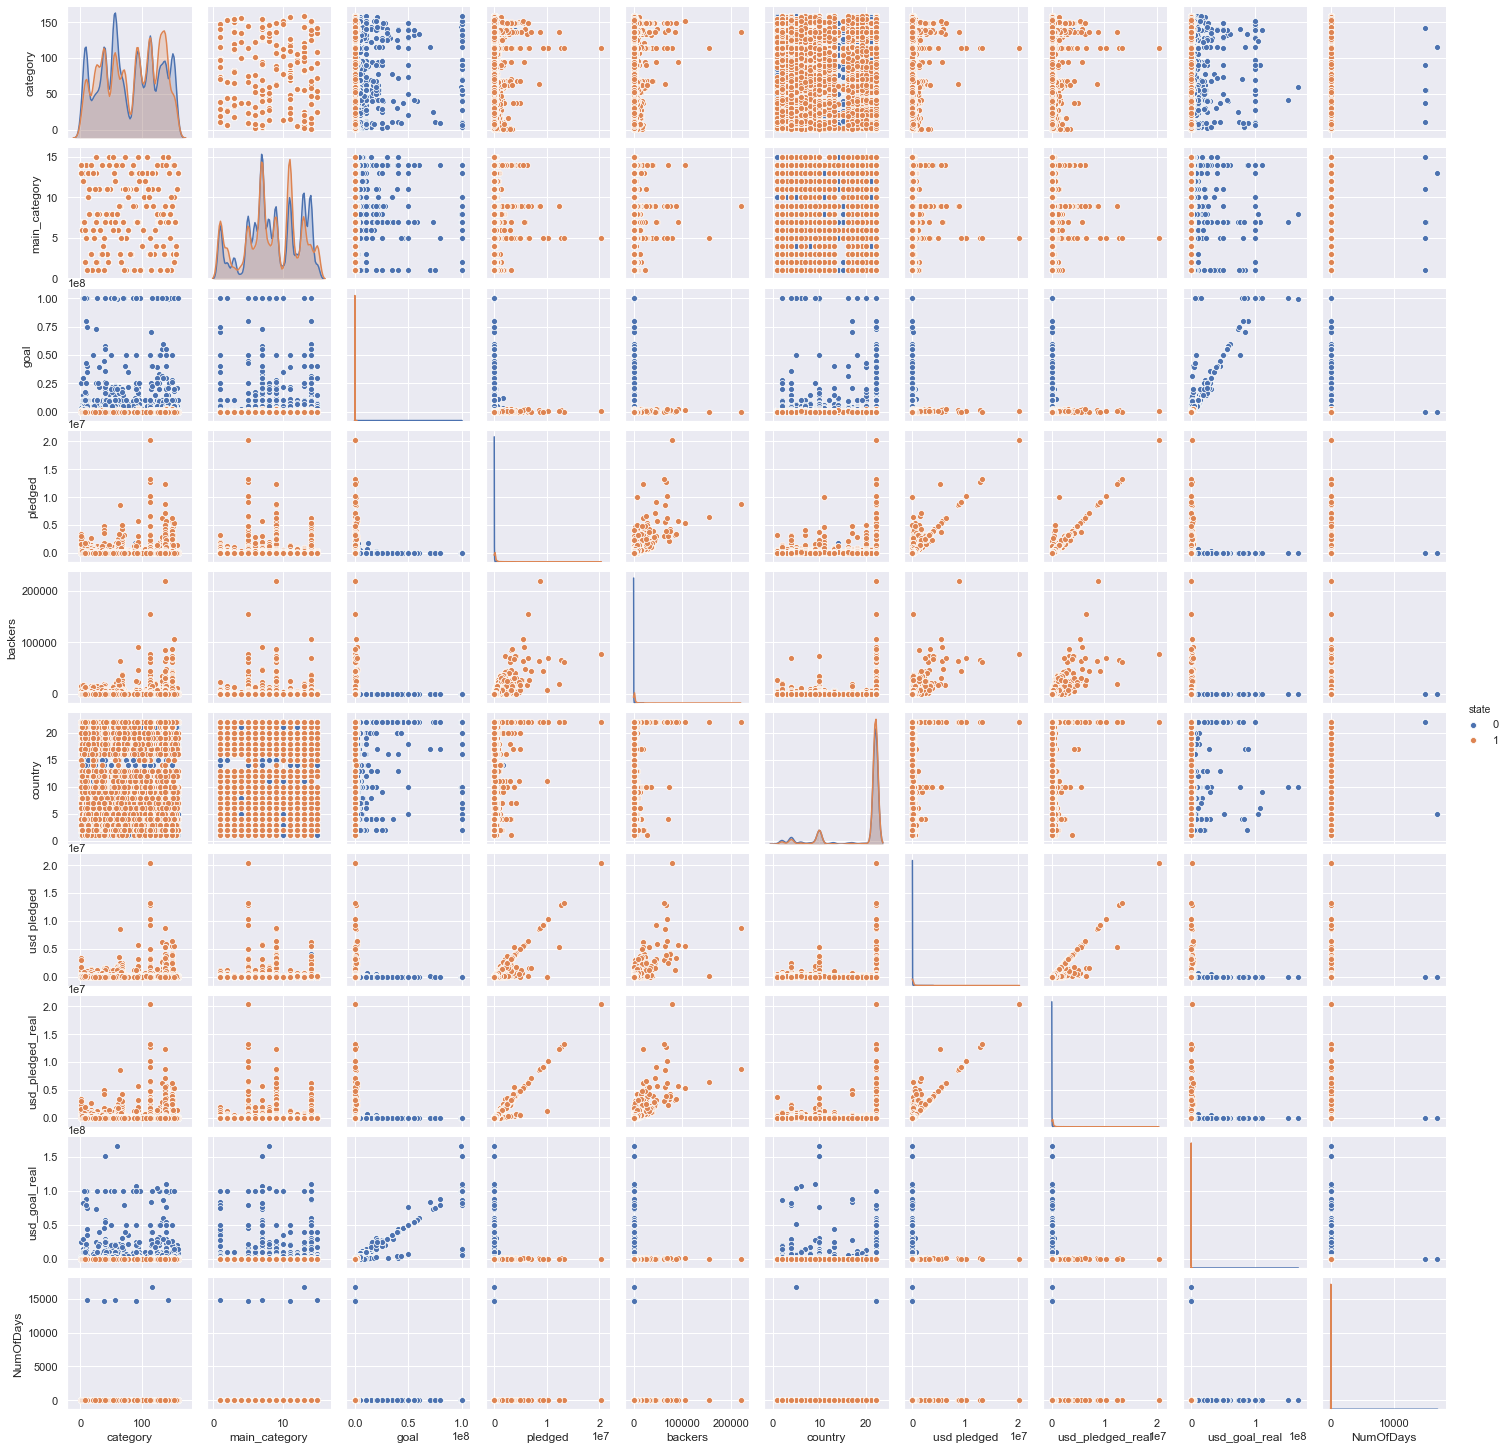

In [24]:
sns.set()
columns = data.columns
sns.pairplot(data[columns],size = 2 ,kind ='scatter',diag_kind='kde',hue="state")
plt.show()

### Transform the data

As is seen in the above plot, there are seven parameters that need to transform. I need to break their one column distribution and turn it to more bell-shaped distribution. Such distribution helps the ML algorithm to find the hidden patterns.

For this transformation, we raised the following columns to some powers.
Lets transforming parameters including: goal, backers, pledged, usd pledged, usd_pledged_real, usd_goal_real and NumberOfDats as follow.

In [25]:
data['goal']=data['goal']**(1/20)
data['backers']=data['backers']**(1/10)
data['pledged']=data['pledged']**(1/15)
data['usd pledged']=data['usd pledged']**(1/15)
data['usd_pledged_real']=data['usd_pledged_real']**(1/15)
data['NumOfDays']=data['NumOfDays']**(1/10)
data['usd_goal_real']=data['usd_goal_real']**(1/15)
data.head()

,category,main_category,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,NumOfDays
0,109,13,1.412538,0.000000,0,0.000000,10,0.000000,0.000000,1.630750,1.502136
1,94,7,1.674388,1.681124,0,1.311019,22,1.359356,1.681124,1.988267,1.505470
2,94,7,1.708680,1.432721,0,1.116123,22,1.432721,1.432721,2.042745,1.463212
3,91,11,1.530906,1.000000,0,1.000000,22,1.000000,1.000000,1.764404,1.404450
4,56,7,1.638709,1.611444,0,1.302005,22,1.611444,1.611444,1.931979,1.494654


And check out the distribution plot again.

c:\users\daslab hareland 3\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


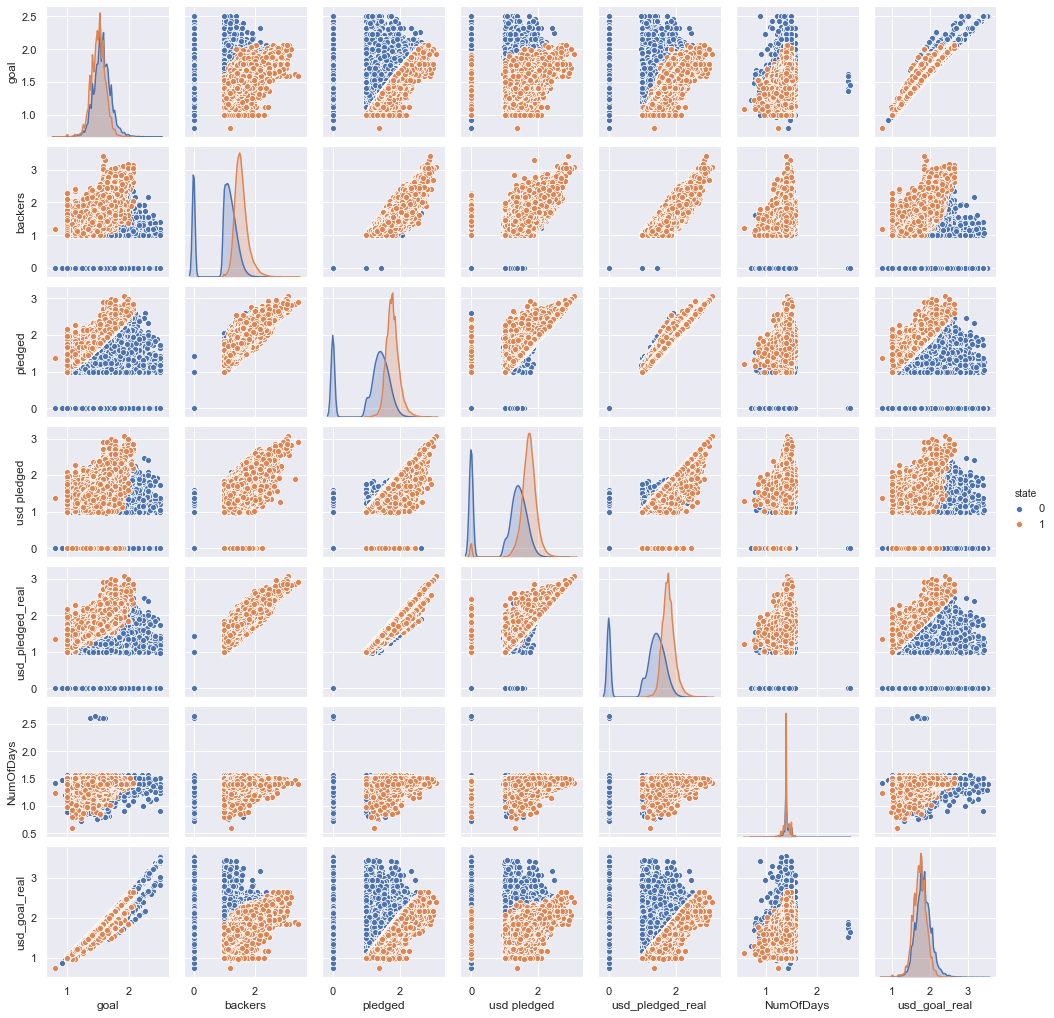

In [26]:
sns.set()
columns = ['goal', 'backers', 'pledged', 'usd pledged', 'usd_pledged_real', 'NumOfDays', 'usd_goal_real', 'state']
sns.pairplot(data[columns],size = 2 ,kind ='scatter',diag_kind='kde',hue="state")
plt.show()

### Seperate Y from Xs.
Seperate the feather columns from object column ('state') in this project.

In [27]:
state = data['state']

In [28]:
data.drop(labels = ["state"], axis = 1, inplace = True)
data.head()

,category,main_category,goal,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real,NumOfDays
0,109,13,1.412538,0.000000,0.000000,10,0.000000,0.000000,1.630750,1.502136
1,94,7,1.674388,1.681124,1.311019,22,1.359356,1.681124,1.988267,1.505470
2,94,7,1.708680,1.432721,1.116123,22,1.432721,1.432721,2.042745,1.463212
3,91,11,1.530906,1.000000,1.000000,22,1.000000,1.000000,1.764404,1.404450
4,56,7,1.638709,1.611444,1.302005,22,1.611444,1.611444,1.931979,1.494654


### Spliting data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data, state, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(299891, 10) (299891,)
(74973, 10) (74973,)


### Fitting ML algorithms

Let's try several classification models (ML) to see which one gives the best accuracy for its predictions.

### Validation Data Set

In [30]:
X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets

Evaluate the model performance using make_scorere and accuracy_score function from sklearn metrics.

# KNeighbors Model

In [31]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_training, y_training)
pred_knn = knn_clf.predict(X_valid)
acc_knn = accuracy_score(y_valid, pred_knn)
print('acc_knn = \n', acc_knn)

acc_knn = 
 0.9631370979842945


Depend on the project you may try to optimize the models to reduce **FP** or **FN**.

To zoom on Fraudulent transaction recognization, optimize the sensitivity, or To get email spam to optimize your model to achieve the high precision or specificity. and so on...

For two-class classification projects like this one, we can focus on accuracy. 

Note that we need to have almost a balanced output (number of 0 and 1).

Other important criterion which commonly is used, is the **Area under the curve** or **AUC**.

For regression problems, on the other hand-side, we need to focus on several parameters including **R-square**, **standard deviation**, and root means square error (**RMSE**). By comparing these three parameters, one can achieve a correct idea about the model strength.

In [32]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_valid, pred_knn)
print('confusion_matrix = \n', confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

confusion_matrix = 
 [[37196  1330]
 [  881 20572]]


### Accuracy 

In [33]:
#how often is the classifier correct?
# use float to perform true division, not integer division
print('(TP + TN) / float(TP + TN + FP + FN) = \n', (TP + TN) / float(TP + TN + FP + FN))
print('\naccuracy_score = \n', metrics.accuracy_score(y_valid, pred_knn))

(TP + TN) / float(TP + TN + FP + FN) = 
 0.9631370979842945

accuracy_score = 
 0.9631370979842945


### Precision

In [34]:
# Precision: When a positive value is predicted, how often is the prediction correct? Precision = TP/TP+FP
precision = TP / float(TP + FP)
print('precision = \n', precision)
print('\n(TP + TN) / float(TP + TN + FP + FN) = \n', (TP + TN) / float(TP + TN + FP + FN))

precision = 
 0.9392749520591727

(TP + TN) / float(TP + TN + FP + FN) = 
 0.9631370979842945


### Sensitivity or Recall

In [35]:
# Sensitivity: When the actual value is positive, how often is the prediction correct?
sensitivity = TP / float(FN + TP)
print('sensitivity = \n', sensitivity)
print('\n(TP + TN) / float(TP + TN + FP + FN) = \n', (TP + TN) / float(TP + TN + FP + FN))

sensitivity = 
 0.9589334824966205

(TP + TN) / float(TP + TN + FP + FN) = 
 0.9631370979842945


### F1 score

This score takes both false positives and false negatives into account.

In [36]:
# F1 Score = 2*(sensitivity * Precision) / (sensitivity + Precision)
F1_Score = 2*(sensitivity * precision) / (sensitivity + precision)
print('F1_Score = \n', F1_Score)
print('\n(TP + TN) / float(TP + TN + FP + FN) = \n', (TP + TN) / float(TP + TN + FP + FN))

F1_Score = 
 0.94900242186599

(TP + TN) / float(TP + TN + FP + FN) = 
 0.9631370979842945


In [37]:
# Specificity: When the actual value is negative, how often is the prediction correct?
specificity = TN / (TN + FP)
print('specificity = \n', specificity)
print('\n(TP + TN) / float(TP + TN + FP + FN) \n', (TP + TN) / float(TP + TN + FP + FN))

specificity = 
 0.9654778591081348

(TP + TN) / float(TP + TN + FP + FN) 
 0.9631370979842945


In [38]:
# False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
false_positive_rate = FP / float(TN + FP)
print('false_positive_rate = \n', false_positive_rate)
# and false negative rate
print('\n1 - specificity = \n', 1 - specificity)

false_positive_rate = 
 0.034522140891865234

1 - specificity = 
 0.03452214089186523


# RandomForest Model

In [39]:
rf_clf = RandomForestClassifier(n_estimators=50, n_jobs=-1) # increase the number of trees to get better results
rf_model=rf_clf.fit(X_training, y_training)
pred_rf = rf_clf.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)
print('acc_rf = \n', acc_rf)
print('\nconfusion_matrix = \n', metrics.confusion_matrix(y_valid, pred_knn))

acc_rf = 
 0.9946814718484803

confusion_matrix = 
 [[37196  1330]
 [  881 20572]]


Check out what feathers are important determined by the model.

In [40]:
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.23278847626071852, 'usd_pledged_real'),
 (0.2287456892688029, 'backers'),
 (0.15936142971139788, 'pledged'),
 (0.14718026369317105, 'usd_goal_real'),
 (0.13344371147799258, 'goal'),
 (0.08309472608398145, 'usd pledged'),
 (0.007832486624134074, 'NumOfDays'),
 (0.0027533958126919667, 'category'),
 (0.0027013124862209927, 'main_category'),
 (0.002098508580888567, 'country')]

### ROC for RandomForest Model

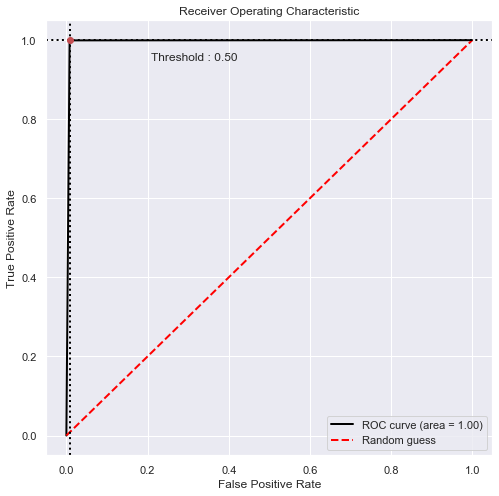

In [41]:
# Visualisation with plot_metric
bc = BinaryClassification(y_valid, pred_rf, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(8,8))
bc.plot_roc_curve()
plt.show()

# LogisiticRegression Model

In [42]:
logreg_clf = LogisticRegression()
logreg_clf.fit(X_training, y_training)
pred_logreg = logreg_clf.predict(X_valid)
acc_logreg = accuracy_score(y_valid, pred_logreg)
print('acc_logreg = \n', acc_logreg)
print('\nconfusion_matrix = \n', metrics.confusion_matrix(y_valid, pred_logreg))

acc_logreg = 
 0.9832441354474066

confusion_matrix = 
 [[37655   871]
 [  134 21319]]


c:\users\daslab hareland 3\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### ROC for LogisiticRegression Model

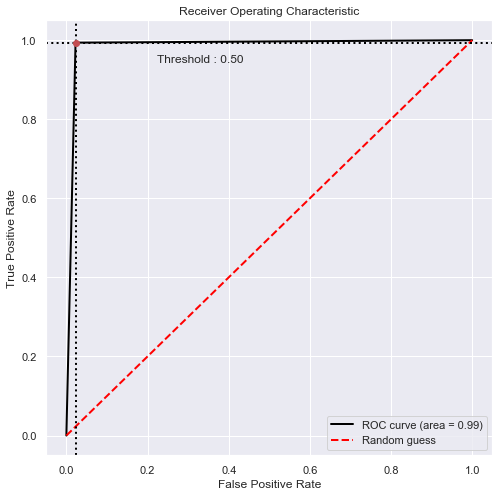

In [43]:
# Visualisation with plot_metric
bc = BinaryClassification(y_valid, pred_logreg, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(8,8))
bc.plot_roc_curve()
plt.show()

# DecisionTree Model

In [44]:
dt_clf = DecisionTreeClassifier(max_depth = 3)
dt_clf.fit(X_training, y_training)
pred_dt = dt_clf.predict(X_valid)
acc_dt = accuracy_score(y_valid, pred_dt)
print('acc_dt = \n', acc_dt)
print('\nconfusion_matrix = \n', metrics.confusion_matrix(y_valid, pred_dt))

acc_dt = 
 0.9184214475066274

confusion_matrix = 
 [[34684  3842]
 [ 1051 20402]]


### ROC for DecisionTree Model

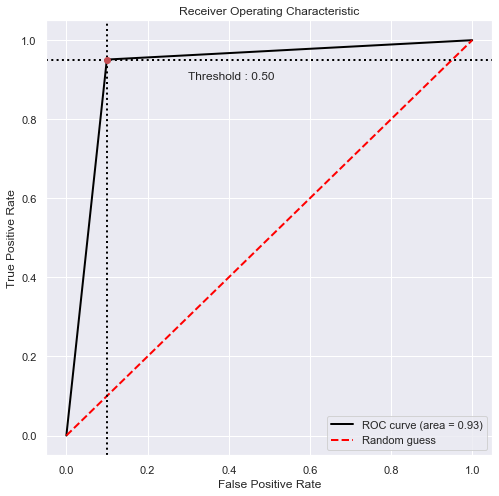

In [45]:
# Visualisation with plot_metric
bc = BinaryClassification(y_valid, pred_dt, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(8,8))
bc.plot_roc_curve()
plt.show()

In [46]:
feature_names = np.array(list(data.columns))
target_names = np.array(['unsuccess', 'success'])

### Lets check out a visualization

Check out the text representation of your tree here.

In [47]:
text_representation = tree.export_text(dt_clf)
print(text_representation)

|--- feature_4 <= 1.33
|   |--- feature_8 <= 1.56
|   |   |--- feature_7 <= 1.42
|   |   |   |--- class: 0
|   |   |--- feature_7 >  1.42
|   |   |   |--- class: 1
|   |--- feature_8 >  1.56
|   |   |--- feature_7 <= 1.58
|   |   |   |--- class: 0
|   |   |--- feature_7 >  1.58
|   |   |   |--- class: 0
|--- feature_4 >  1.33
|   |--- feature_8 <= 1.82
|   |   |--- feature_7 <= 1.66
|   |   |   |--- class: 1
|   |   |--- feature_7 >  1.66
|   |   |   |--- class: 1
|   |--- feature_8 >  1.82
|   |   |--- feature_7 <= 1.83
|   |   |   |--- class: 0
|   |   |--- feature_7 >  1.83
|   |   |   |--- class: 1



And check out the tree figure below.

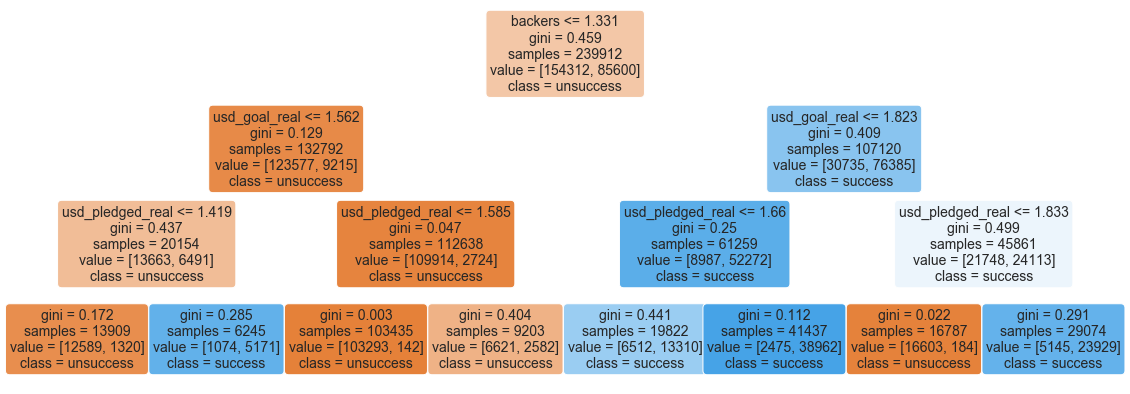

In [48]:
plt.figure(figsize=(20,7))
a = tree.plot_tree(dt_clf, 
              feature_names=feature_names, 
              class_names=target_names, 
              filled=True, 
              rounded=True, 
              fontsize=14)

Let's use the default max-depth number

In [49]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_training, y_training)
pred_dt = dt_clf.predict(X_valid)
acc_dt = accuracy_score(y_valid, pred_dt)
print('acc_dt = \n', acc_dt)
print('\nconfusion_matrix = \n', metrics.confusion_matrix(y_valid, pred_dt))

acc_dt = 
 0.9901965687990797

confusion_matrix = 
 [[38245   281]
 [  307 21146]]


# GaussianNB Model

In [50]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_training, y_training)
pred_gnb = gnb_clf.predict(X_valid)
acc_gnb = accuracy_score(y_valid, pred_gnb)
print('acc_gnb = \n', acc_gnb)
print('\nconfusion_matrix = \n', metrics.confusion_matrix(y_valid, pred_gnb))

acc_gnb = 
 0.7762716950932826

confusion_matrix = 
 [[26462 12064]
 [ 1355 20098]]


### ROC for GaussianNB Model

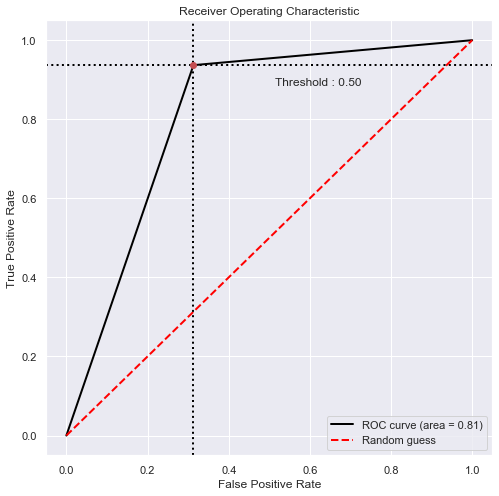

In [51]:
# Visualisation with plot_metric
bc = BinaryClassification(y_valid, pred_gnb, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(8,8))
bc.plot_roc_curve()
plt.show()

# Linear SVC Model

In [52]:
linsvc_clf = LinearSVC()
linsvc_clf.fit(X_training, y_training)
pred_linsvc = linsvc_clf.predict(X_valid)
acc_linsvc = accuracy_score(y_valid, pred_linsvc)
print('acc_linsvc = \n', acc_linsvc)
print('\nconfusion_matrix = \n', metrics.confusion_matrix(y_valid, pred_linsvc))

acc_linsvc = 
 0.981993697794228

confusion_matrix = 
 [[37446  1080]
 [    0 21453]]


c:\users\daslab hareland 3\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### ROC for Linear SVC Model

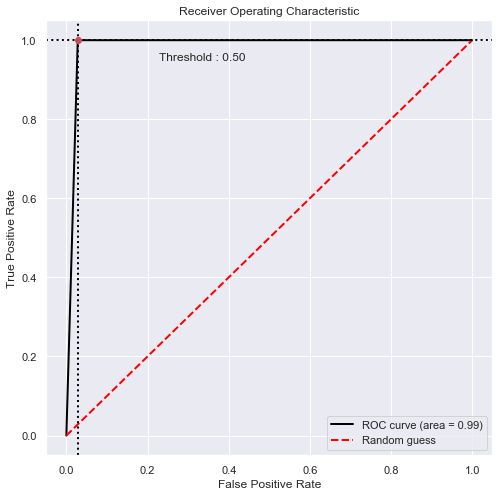

In [53]:
# Visualisation with plot_metric
bc = BinaryClassification(y_valid, pred_linsvc, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(8,8))
bc.plot_roc_curve()
plt.show()

# Evaluating Models Performances

In [54]:
model_performance = pd.DataFrame({
    "Model": ["Linear SVC", "Random Forest", 
              "Logistic Regression", "K Nearest Neighbors", "Gaussian Naive Bayes",  
              "Decision Tree"],
    "Accuracy": [acc_linsvc, acc_rf, 
              acc_logreg, acc_knn, acc_gnb, acc_dt]
})

model_performance.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
1,Random Forest,0.994681
5,Decision Tree,0.990197
2,Logistic Regression,0.983244
0,Linear SVC,0.981994
3,K Nearest Neighbors,0.963137
4,Gaussian Naive Bayes,0.776272


It is seen that the Random Forest is the best model.

Apply the Random Forest to test data to see how much it works

In [55]:
pred_rf = rf_clf.predict(X_test)
acc_rf = accuracy_score(y_test, pred_rf)
print('acc_rf = \n', acc_rf)

acc_rf = 
 0.9950648900270764


### Recommendations

* Note that we did not check out the number of 1 to the number of 0. The ratio in this project is 35(1) to 65(0). This can results model to achieve bias toward 0 predictions. In the case of low accuracy results, we can use the oversampling technique and follow the same steps above.
* The confusion matrix shows good results therefore we don't need to consider oversampling procedure.
```
confusion_matrix = 
 [[38207   299]
 [  322 21151]]
```
* The ML algorithms results are promising with an average accuracy of 0.93.
* The same project can be solved as a multi-classification (5 separate output).
* No ML algorithm hyperparameter tuning done. In case of not having a good results, the hyper-paramter optimization is suggested.
